In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
data_dt = pd.read_excel('output/Results_10CV.xlsx', sheet_name = 'DecisionTreeClassifier')
data_rf = pd.read_excel('output/Results_10CV.xlsx', sheet_name = 'RandomForestClassifier')
data_knn = pd.read_excel('output/Results_10CV.xlsx', sheet_name = 'KNeighborsClassifier')
data_erlc = pd.read_excel('output/Results_10CV.xlsx', sheet_name = 'ERLC')

In [3]:
data_dt.head()

,Unnamed: 0,Accuracy,F1-Score,MCC,Training Time,Testing Time
0,0,0.913498,0.913425,0.910660,16.258458,0.006604
1,1,0.914264,0.914373,0.911387,19.327668,0.003139
2,2,0.905716,0.905824,0.902581,9.742313,0.002855
3,3,0.911712,0.911722,0.908823,9.502948,0.002746
4,4,0.911202,0.911306,0.908303,9.647490,0.003042


In [4]:
def get_metric(data_array, metric='Accuracy'):
    models = ['DecisionTreeClassifier', 'RandomForestClassifier', 'KNeighborsClassifier', 'ERLC' ]
    df = pd.DataFrame()
    for i in range(len(data_array)):
        temp = data_array[i]
        temp2 = temp[metric]
        df[models[i]] = temp2
        
    return df

In [5]:
model_names = ['DT', 'RF', 'KNN', 'ERLC']

In [6]:
acc = get_metric([data_dt, data_rf, data_knn, data_erlc])
f1 = get_metric([data_dt, data_rf, data_knn, data_erlc], metric='F1-Score')
mcc = get_metric([data_dt, data_rf, data_knn, data_erlc], metric='MCC')

## 1.0 Table

In [7]:
acc.head()

,DecisionTreeClassifier,RandomForestClassifier,KNeighborsClassifier,ERLC
0,0.913498,0.928936,0.758612,0.953304
1,0.914264,0.918474,0.746619,0.946925
2,0.905716,0.920643,0.752615,0.951135
3,0.911712,0.926257,0.753636,0.950880
4,0.911202,0.926257,0.757846,0.954070


In [8]:
def getStats(df):
    '''
    Get the mean and standard deviation of columns of a dataframe
    '''
    means = []
    stds = []
    for c in df.columns:
        means.append(df[c].mean())
        stds.append(df[c].std())

    return means,stds

In [9]:
acc_means, acc_stds = getStats(acc)
f1_means, f1_stds = getStats(f1)
mcc_means, mcc_stds = getStats(mcc)

We will combine means and standard deviations with "plus-minus sign"

In [10]:
decimals = 4
plusMinus = "$\pm$"
acc_final = []
f1_final = []
mcc_final = []
for i in range(len(model_names)):
    acc_str = '{} {} {}'.format( round(acc_means[i], decimals) ,plusMinus, round(acc_stds[i],decimals) )
    acc_final.append(acc_str)
    f1_str = '{} {} {}'.format( round(f1_means[i], decimals) , plusMinus, round(f1_stds[i],decimals) )
    f1_final.append(f1_str)
    mcc_str = '{} {} {}'.format( round(mcc_means[i], decimals), plusMinus, round(mcc_stds[i],decimals) )
    mcc_final.append(mcc_str)

Now we will build the results as a table seperated by "&" for use in latex

In [11]:
results_df = pd.DataFrame({
    "Model": model_names,
    "Accuracy": acc_final,
    "F1-Score": f1_final,
    "MCC": mcc_final,
})
results_df.to_csv('output/resultsTable1.txt', sep = '&', index=False)

In [12]:
with open('output/resultsTable1.txt', 'r') as istr:
    with open('output/latex/resultsTable.txt', 'w') as ostr:
        for line in istr:
            line = line.rstrip('\n') + '\\\\'
            print(line, file=ostr)
            
# Remove old file
os.remove('output/resultsTable1.txt') 

## 2.0 Plots


### 2.1 Correlation Plots

#### 2.1.1 Correlation Per Attack Label

In [2]:
corr_results = pd.read_csv('output/results_pearsonCorr.csv')
corr_results['Attack Label'] = corr_results['Attack Label'].apply(str)
corr_results.head()

,Attack Label,Pearson Correlation
0,1,0.7928
1,2,0.8662
2,3,0.9090
3,4,0.8564
4,5,0.9494


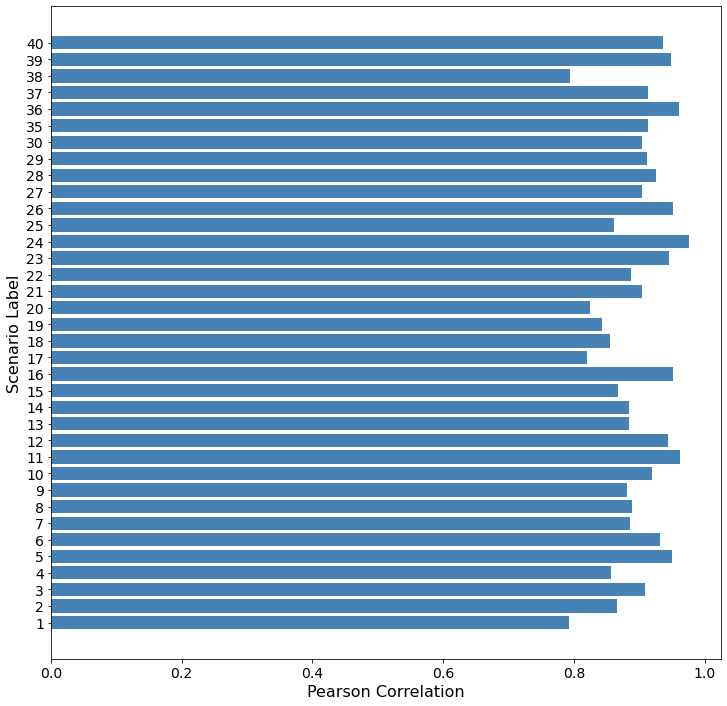

In [12]:
indexes = range(36)
plt.figure(figsize = (12,12))
plt.barh( indexes, corr_results['Pearson Correlation'], color = "steelblue")
plt.yticks(indexes, corr_results['Attack Label'], fontsize = 14)
plt.xticks(fontsize=14)
plt.xlabel('Pearson Correlation', fontsize = 16)
plt.ylabel('Scenario Label', fontsize = 16)
plt.savefig('output/figures/pearsonCorrPerLabel.pdf')
plt.savefig('output/figures/pearsonCorrPerLabel.png')

#### 2.1.2 Correlation Per Split

In [15]:
corr_split_results = pd.read_csv('output/results_avgCorrelationPerSplit.csv')

In [16]:
corr_split_results.head()

,Split,Average Correlation
0,0.10,0.815292
1,0.15,0.834964
2,0.20,0.890081
3,0.25,0.897275
4,0.30,0.926139


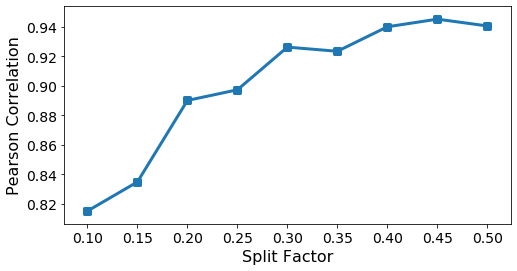

In [28]:
splits = corr_split_results['Split']
avg_corr = corr_split_results['Average Correlation']

plt.figure(figsize = (8,4))
plt.plot(splits,avg_corr, linewidth = 3)
plt.scatter(splits, avg_corr, linewidth = 3, marker = 's')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Split Factor', fontsize = 16)
plt.ylabel('Pearson Correlation', fontsize = 16)
plt.savefig('output/figures/pearsonCorrPerSplit.pdf')
plt.savefig('output/figures/pearsonCorrPerSplit.png')

### Box Plots
#### 2.2.1 Accuracy Plot

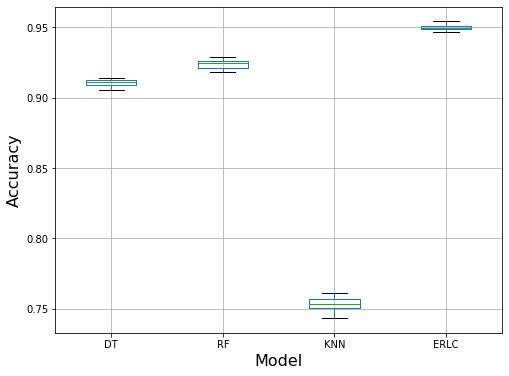

In [18]:
plt.figure(figsize = (8,6))
acc.boxplot()
locs, labels = plt.xticks()
plt.xticks(locs, model_names)
plt.xlabel("Model", fontsize = 16)
plt.ylabel("Accuracy", fontsize = 16)
plt.savefig("output/figures/cv_acc.pdf")

### 2.2 F1 Score Plot

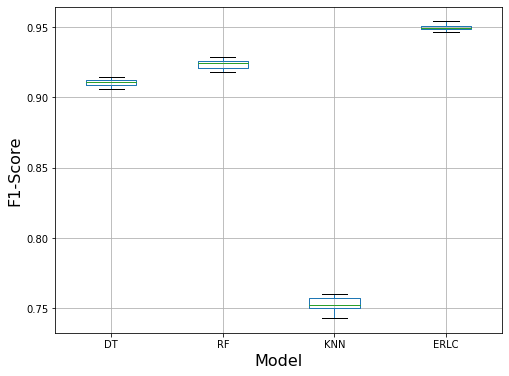

In [19]:
plt.figure(figsize = (8,6))
f1.boxplot()
locs, labels = plt.xticks()
plt.xticks(locs, model_names)
plt.xlabel("Model", fontsize = 16)
plt.ylabel("F1-Score", fontsize = 16)
plt.savefig("output/figures/cv_f1.pdf")

### 2.3 MCC Plot

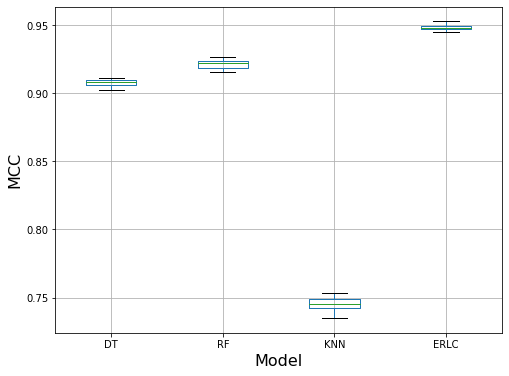

In [20]:
plt.figure(figsize = (8,6))
mcc.boxplot()
locs, labels = plt.xticks()
plt.xticks(locs, model_names)
plt.xlabel("Model", fontsize = 16)
plt.ylabel("MCC", fontsize = 16)
plt.savefig("output/figures/cv_mcc.pdf")

## 3.0 Scalability

In [21]:
sdata_dt = pd.read_excel('output/Results_scalabilityAnalysis_10intervals.xlsx', sheet_name = 'DecisionTreeClassifier')
sdata_rf = pd.read_excel('output/Results_scalabilityAnalysis_10intervals.xlsx', sheet_name = 'RandomForestClassifier')
sdata_knn = pd.read_excel('output/Results_scalabilityAnalysis_10intervals.xlsx', sheet_name = 'KNeighborsClassifier')
sdata_erlc = pd.read_excel('output/Results_scalabilityAnalysis_10intervals.xlsx', sheet_name = 'ERLC')

In [22]:
sdata_dt

,Unnamed: 0,Feature Percentage,Accuracy,F1-Score,MCC,Training Time,Testing Time
0,0,0.1,0.677596,0.678171,0.666978,1.318656,0.005069
1,1,0.2,0.910628,0.910556,0.907710,1.579893,0.004343
2,2,0.3,0.897295,0.897236,0.893921,2.713536,0.006226
3,3,0.4,0.711661,0.711840,0.702073,4.046561,0.006137
4,4,0.5,0.738836,0.738850,0.730272,4.868561,0.006698
5,5,0.6,0.735200,0.735135,0.726571,6.728770,0.007693
6,6,0.7,0.901952,0.901993,0.898735,6.438371,0.006067
7,7,0.8,0.902399,0.902285,0.899195,6.681471,0.006816
8,8,0.9,0.901505,0.901598,0.898291,7.718063,0.005997
9,9,1.0,0.902335,0.902417,0.899145,8.142084,0.006557


In [23]:
time_dt = sdata_dt['Testing Time']
time_rf = sdata_rf['Testing Time']
time_knn = sdata_knn['Testing Time']
time_erlc = sdata_erlc['Testing Time']
feature_percentages = np.arange(0.1,1.1,0.1)

In [24]:
time_dt = time_dt / max(time_dt)
time_rf = time_rf / max(time_rf)
time_knn = time_knn / max(time_knn)
time_erlc = time_erlc / max(time_erlc)

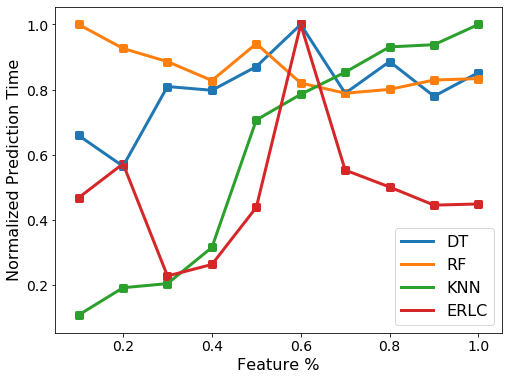

In [25]:
plt.figure(figsize = (8,6))
plt.plot(feature_percentages, time_dt, linewidth = 3, label = 'DT')
plt.scatter(feature_percentages, time_dt, linewidth = 3, marker = 's')

plt.plot(feature_percentages, time_rf, linewidth = 3, label = 'RF')
plt.scatter(feature_percentages, time_rf, linewidth = 3, marker = 's')

plt.plot(feature_percentages, time_knn, linewidth = 3, label = 'KNN')
plt.scatter(feature_percentages, time_knn, linewidth = 3, marker = 's')

plt.plot(feature_percentages, time_erlc, linewidth = 3, label = 'ERLC')
plt.scatter(feature_percentages, time_erlc, linewidth = 3, marker = 's')

plt.legend(prop={'size': 16})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Feature %', fontsize = 16)
plt.ylabel('Normalized Prediction Time', fontsize = 16)
plt.savefig('output/figures/predictionTime_features.pdf')